In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import binary_crossentropy

sns.set_theme()

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.drop_duplicates()
del df['RowNumber']
del df['CustomerId']
del df['Surname']
df=pd.get_dummies(df, columns=['Geography', 'Gender'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [5]:
saved_values={}
columns2save=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
for column in columns2save:
    saved_values[column]=[df[column].min(), df[column].mean(), df[column].max()]
    df[column]=list(map(lambda x: (x-df[column].min())/(df[column].max()-df[column].min()), df[column]))
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1.0,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1.0,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0.0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0.0,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0.0,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1.0,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1.0,0,1,0,0,1


In [6]:
X = df.copy()
X.drop('Exited',axis = 1,inplace = True)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

m_train=X_train.shape[0]
m_test=X_test.shape[0]

print(f'Number of trainig exaples: {m_train}')
print(f'Number of testing exaples: {m_test}')
print(f'train_set_x shape: {X_train.shape}')
print(f'test_set_x shape: {X_test.shape}')
print(f'train_set_y shape: {y_train.shape}')
print(f'test_set_y shape: {y_test.shape}')


Number of trainig exaples: 8000
Number of testing exaples: 2000
train_set_x shape: (8000, 13)
test_set_x shape: (2000, 13)
train_set_y shape: (8000,)
test_set_y shape: (2000,)


In [36]:
model=Sequential([
    tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu', input_shape=(13, 1)),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

In [37]:
history=model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4796 - acc: 0.7974
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4219 - acc: 0.8156
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4043 - acc: 0.8271
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3913 - acc: 0.8331
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3803 - acc: 0.8410
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3759 - acc: 0.8416
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3662 - acc: 0.8480
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3628 - acc: 0.8499
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3579 - acc: 0.8509
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3574 - acc: 0.8539
Epoch 11/100
250/250 [=================

In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 13, 32)            128       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 6, 128)            12416     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 3, 128)           0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 3, 128)            0         
                                                                 
 flatten_7 (Flatten)         (None, 384)              

In [39]:
model.save('kostenko_model_initial.h5')

In [40]:
acc=history.history['acc']
print(f'Accuracy after 1st epoch: {acc[0]}') 
print(f'Accuracy after 50st epoch: {acc[49]}') 
print(f'Accuracy after 100st epoch: {acc[99]}')

Accuracy after 1st epoch: 0.7973750233650208
Accuracy after 50st epoch: 0.878000020980835
Accuracy after 100st epoch: 0.9024999737739563


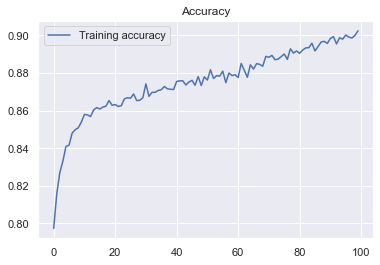

<Figure size 432x288 with 0 Axes>

In [41]:
epochs=range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy') 
plt.title('Accuracy') 
plt.legend() 
plt.figure() 
plt.show()

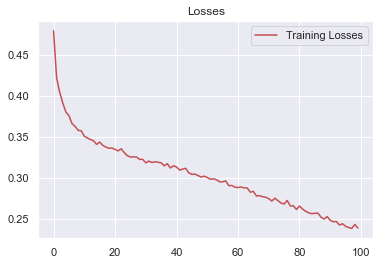

<Figure size 432x288 with 0 Axes>

In [42]:
losses=history.history['loss']
plt.plot(epochs, losses, 'r', label='Training Losses')
plt.title('Losses')
plt.legend()
plt.figure()
plt.show()

In [43]:
scores=model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on test data: {scores[1]*100}')

Accuracy on test data: 84.50000286102295
